**Data sources**
- Observatorio de Vioencia Sivigila



# RUN ME FIRST

In [ ]:
# RUN ME FIRST
#import re
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from folium import plugins
from folium.plugins import HeatMap

# Functions
def merge_on_common(df1, df2, verbose=False):
    columns1 = set(list(df1.columns))
    columns2 = set(list(df2.columns))
    common_columns = columns1.intersection(columns2)
    if verbose:
        print(f"common_columns for merging: {common_columns}")
    return pd.merge(df1, df2, how="inner", on=list(common_columns))

def merge_trysuicides_population_geo():
    print("Merging suicides tries, population and geo ...")
    dfs = pd.read_csv("INPUTDATA/CSV/2016-2022-IntentosSuicidios.csv")
    dfs.drop(columns=["Unnamed: 0"], inplace=True)
    # group by year
    # read other data
    dfpopulation = pd.read_csv("INPUTDATA/NEWCSV/Population-2016-2022.csv")
    dfgeo = pd.read_csv("INPUTDATA/NEWCSV/CodigosDivisionPolitica.csv")
    #dffull = pd.merge(dfs, dfpopulation, how="inner", on=["YEAR"])
    dffull = merge_on_common(dfs, dfpopulation, verbose=True)
    dffull = merge_on_common(dffull, dfgeo, verbose=True)
    return dffull

def read_clean_writenewdata():
    merge_trysuicides_population_geo().to_csv("INPUTDATA/NEWCSV/MERGED-TrySuicidiosPopulationGeo.csv", index=False)
read_clean_writenewdata()

def plot_trysuicides_per_dpto_year_population(normalized):
    df = pd.read_csv("INPUTDATA/NEWCSV/MERGED-TrySuicidiosPopulationGeo.csv")
    df.drop(columns=["CODE_DPTO", "CODE_MUNICIPIO", "MUNICIPIO", "LONGITUD", "LATITUD"], inplace=True)
    fig, ax = plt.subplots(3, 2, figsize=(13, 12), sharex=True, sharey = True)
    ax = ax.flatten()
    for ii, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]) :
        df_dpto = df[df["YEAR"]==year]
        #print(df_dpto.head())
        # group by department
        COLNAME = "COUNTER_TRY"
        df_dpto = df_dpto.groupby(["DPTO"]).sum().sort_values(COLNAME, ascending=False).reset_index()
        if normalized == True:
            COLNAMENEW = COLNAME + "_OVER_POP"
            df_dpto[COLNAMENEW] = 100000.0*df_dpto[COLNAME]/df_dpto["POPULATION"]
            df_dpto = df_dpto.sort_values(COLNAMENEW, ascending=False).reset_index()
            COLNAME = COLNAMENEW
        #print(df_dpto.head())
        df_dpto.plot(x="DPTO", y=COLNAME, kind="bar", title=f"Intentos Suicidios, {year}", ax=ax[ii])

def map_trysuicides_per_year_population(year):
    df = pd.read_csv("INPUTDATA/NEWCSV/MERGED-TrySuicidiosPopulationGeo.csv")
    #df.drop(columns=["CODE_DPTO", "CODE_MUNICIPIO"], inplace=True) # NOT NEED SINCE I AM KEEPING ONLY LAT AND LONG
    df = df[df["YEAR"]==year]
    #print(df.head())
    # Heat map for count of begin location
    START_COORDS = [4.7110, -74.0721]
    map_aux = folium.Map(location=START_COORDS, zoom_start = 5)
    # Create and clean the heat dataframe
    heat_df = df[['LATITUD', 'LONGITUD']].dropna()
    # Create the list of lists
    heat_df = [[row['LATITUD'],row['LONGITUD']] for index, row in heat_df.iterrows()] # THIS IS SLOW!
    #Add the data to the map and plot
    HeatMap(heat_df, radius=10, blur=15, control=True).add_to(map_aux)
    return map_aux



Merging suicides tries, population and geo ...
common_columns for merging: {'CODE_MUNICIPIO', 'YEAR', 'CODE_DPTO', 'MUNICIPIO', 'DPTO'}
common_columns for merging: {'CODE_MUNICIPIO', 'DPTO', 'CODE_DPTO', 'MUNICIPIO'}


Merging suicides tries, population and geo ...
common_columns for merging: {'YEAR', 'CODE_MUNICIPIO', 'CODE_DPTO', 'DPTO', 'MUNICIPIO'}
common_columns for merging: {'DPTO', 'CODE_DPTO', 'MUNICIPIO', 'CODE_MUNICIPIO'}


,YEAR,WEEK,CODE_DPTO,DPTO,CODE_MUNICIPIO,MUNICIPIO,COUNTER_TRY,POPULATION,LONGITUD,LATITUD
0,2016,6,5,ANTIOQUIA,5001,MEDELLIN,4,2351077,-75.576002,6.248586
1,2016,7,5,ANTIOQUIA,5001,MEDELLIN,5,2351077,-75.576002,6.248586
2,2016,13,5,ANTIOQUIA,5001,MEDELLIN,33,2351077,-75.576002,6.248586
3,2016,22,5,ANTIOQUIA,5001,MEDELLIN,25,2351077,-75.576002,6.248586
4,2016,29,5,ANTIOQUIA,5001,MEDELLIN,27,2351077,-75.576002,6.248586


# Geolocalización y Población

## Intentos de Suicidios por año y departamento

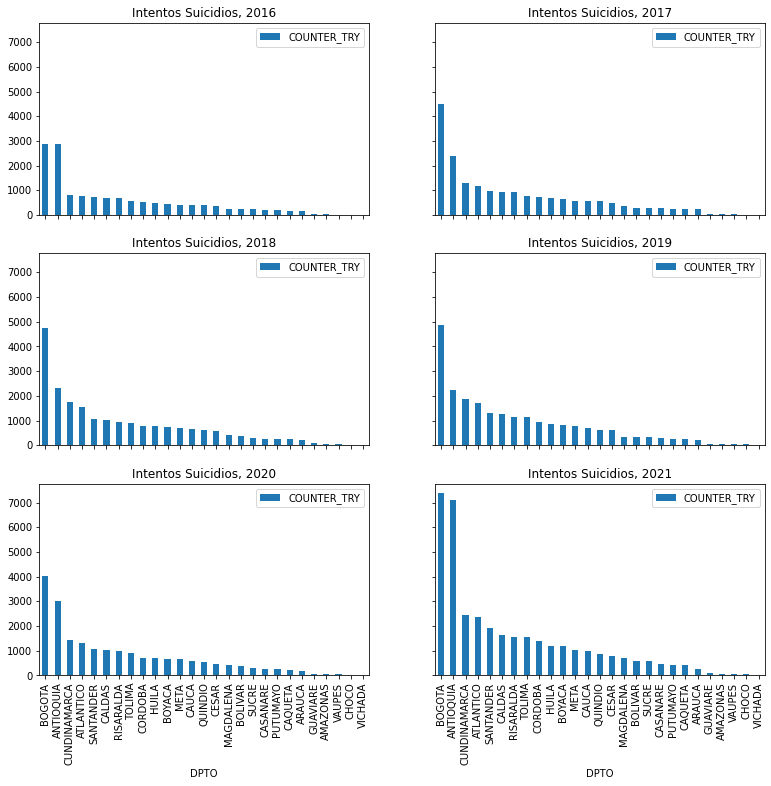

In [ ]:
plot_trysuicides_per_dpto_year_population(normalized=False)

## Intentos de Suicidios por año y departamento, normalizados por población

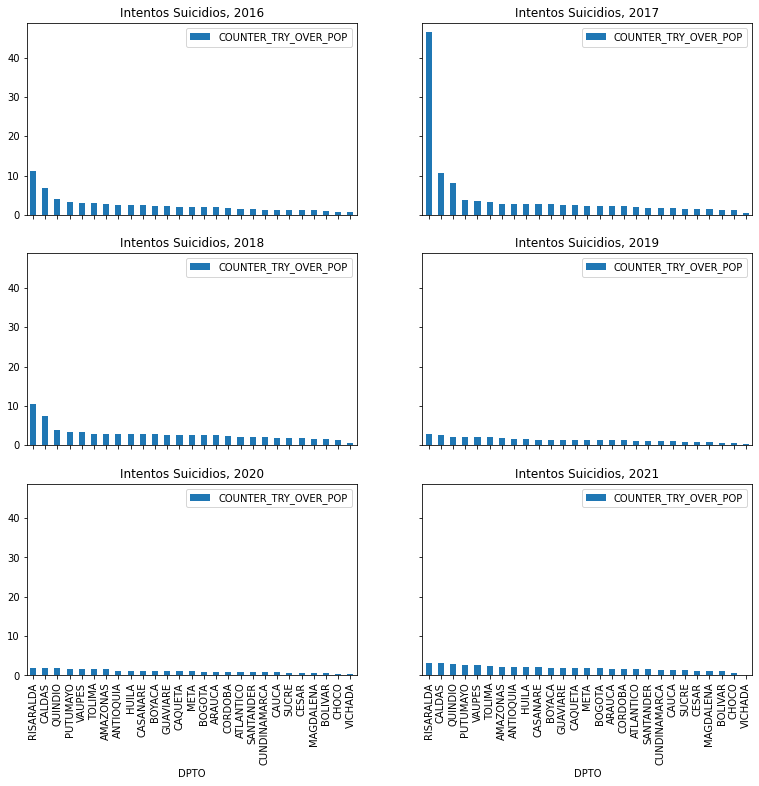

In [ ]:
plot_trysuicides_per_dpto_year_population(normalized=True)


## Map por municipios: Intentos de Suicidios

In [ ]:
mapa = map_trysuicides_per_year_population(2018)
mapa 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70a6331b-3e37-4c4d-8041-2d29d0ba96c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>